#Importações e Instalações - Pode ser que precise reiniciar o runtime por conflito de dependências

Gensim não funcionando com numpy 2.0 quebrou praticamente todas as minhas dependências

In [1]:
%%capture
!pip install --no-deps spacy && python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
%%capture
!pip install numpy==1.25.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.0 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.0 which is incompatible.


In [1]:
%%capture
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2,

In [6]:
%%capture
!pip install --user -U nltk

In [2]:
%%capture
!pip install gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shap
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [8]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

#Carregando o Dataset e filtrando apenas para janeiro/2016 e da categoria mundo

In [9]:
import kagglehub
path = kagglehub.dataset_download("marlesson/news-of-the-site-folhauol")

#lendo dataset e convertendo em um df
df = pd.read_csv(path + '/articles.csv')

#convertendo a coluna date para formato datetime
df['date'] = pd.to_datetime(df['date'])

#filtrando a categoria e o período de tempo
categoria_filtrada = 'mundo'
data_inicio = '2016-01-01'
data_fim = '2016-01-31'

#pegando o df final
df_final = df[(df['category'] == categoria_filtrada) & (df['date'] >= data_inicio) & (df['date'] <= data_fim)].copy()
df_final

,title,text,date,category,subcategory,link
38007,Ban Ki-moon se desculpa por papel da ONU em su...,"O secretário-geral da ONU, Ban Ki-moon, pediu ...",2016-01-12,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/12/183...
38010,Países do Mercosul oficializam suspensão da Ve...,"Brasil, Argentina, Paraguai e Uruguai decidira...",2016-01-12,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/12/183...
38011,Trump oferece benefício fiscal a empresa para ...,"Em fevereiro, 1.400 trabalhadores de Indiana a...",2016-01-12,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/12/183...
38023,"Para Obama, maconha deve ser tratada como álco...","O presidente americano, Barack Obama, afirmou,...",2016-01-12,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/12/183...
38035,"Abertura da China é boa, e Brasil deve ter cau...",A expansão de investimento chinês no mundo e u...,2016-01-12,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/12/183...
...,...,...,...,...,...,...
94254,Erdogan cita Alemanha de Hitler como exemplo d...,"O presidente da Turqia, Tayyip Erdogan citou a...",2016-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/01/172...
94257,Rússia anuncia que vai processar Ucrânia por c...,O ministério russo das Finanças anunciou nesta...,2016-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/01/172...
94258,"Risco de ataque em Munique continua, diz políc...",O risco de ataque de que Munique sofra um ataq...,2016-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/01/172...
94264,Tiros e fogos de artifício matam dois e ferem ...,Balas perdidas e fogos de artifício mal contro...,2016-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2016/01/172...


#Limpeza do texto

In [10]:
corpus_data = df_final['text']

In [11]:
import spacy
nlp = spacy.load('pt_core_news_sm', disable=["parser", "ner"])

In [12]:
#função para limpeza de texto usando regex
def limpar_texto(series):
    """
    Remove caracteres indesejados de uma Series do pandas usando regex

    Recebe:
        series (pd.Series): pandas Series com textos a serem limpos

    Retorna:
        pd.Series: Textos limpos
    """
    #regex a ser procurado
    padrao = r'[,"\'\-–—]'

    #retorna a series do panda sem os caracteres especificados
    return series.str.replace(padrao, ' ', regex=True)\
                 .str.replace(r'\s+', ' ', regex=True)\
                 .str.strip()

In [13]:
#função para remover stopwords usando spacy
def remover_stopwords(series, nlp=nlp):
    """
    Remove stopwords de um pandas Series usando spaCy com processamento em lotes

    Recebe:
        series (pd.Series): pandas Series com textos a serem processados
        nlp: Pipeline do spaCy

    Retorna:
        pd.Series: Textos sem stopwords
    """
    #Otimização do processamento - realização em batches/lotes
    docs = list(nlp.pipe(series.astype(str), batch_size=50))

    #Filtrando as stopwords
    textos_processados = [
        ' '.join(token.text for token in doc if not token.is_stop)
        for doc in docs
    ]

    return pd.Series(textos_processados, index=series.index)

In [14]:
#pipeline para o processamento completo do texto utilizando as funções anteriores
def pipeline_preprocessamento_spacy(series, nlp=nlp):
    """
    Pipeline para pré-processamento de texto

    Recebe:
        series (pd.Series): pandas Series com textos brutos
        nlp: Pipeline do spaCy

    Retorna:
        pd.Series: Textos pré-processados
    """
    #limpeza inicial com regex
    series = limpar_texto(series)

    #retirada de stopwords
    series = remover_stopwords(series, nlp)

    #lemmatização e padronização com minúsculas
    docs = list(nlp.pipe(series.astype(str)))
    series = pd.Series([
        ' '.join(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct)
        for doc in docs
    ], index=series.index)

    #limpeza final - espaços extras
    return series.str.replace(r'\s+', ' ', regex=True).str.strip()

corpus_limpo = pipeline_preprocessamento_spacy(corpus_data)
corpus_limpo

,0
38007,secretário onu ban ki moon pedir desculpa hait...
38010,brasil argentina paraguai uruguai decidir susp...
38011,fevereiro 1.400 trabalhador indiana antevir ol...
38023,presidente americano barack obama afirmar entr...
38035,expansão investimento chinês mundo potencial c...
...,...
94254,presidente turqia tayyip erdogan citar alemanh...
94257,ministério russo finanças anunciar feira 1º en...
94258,risco ataque munique sofra ataque terrorista c...
94264,balas perder fogo artifício controlar deixar m...


# Separação em Treino e Teste

In [15]:
#somente o X por enquanto, pois não temos y ainda mas não queremos que ocorra data leakage
X_train, X_test = train_test_split(corpus_limpo, test_size=0.2, random_state=42)

# CountVectorizer

In [16]:
#criando um vectorizer
vectorizer = CountVectorizer(encoding='utf-8', lowercase=False, token_pattern=r'\b\w+\b', ngram_range=(1, 2), max_features=10000, stop_words=None, min_df=5, max_df=0.95)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

documents = corpus_limpo.tolist()

feature_names = vectorizer.get_feature_names_out()

### Visualização das palavras mais frequentes

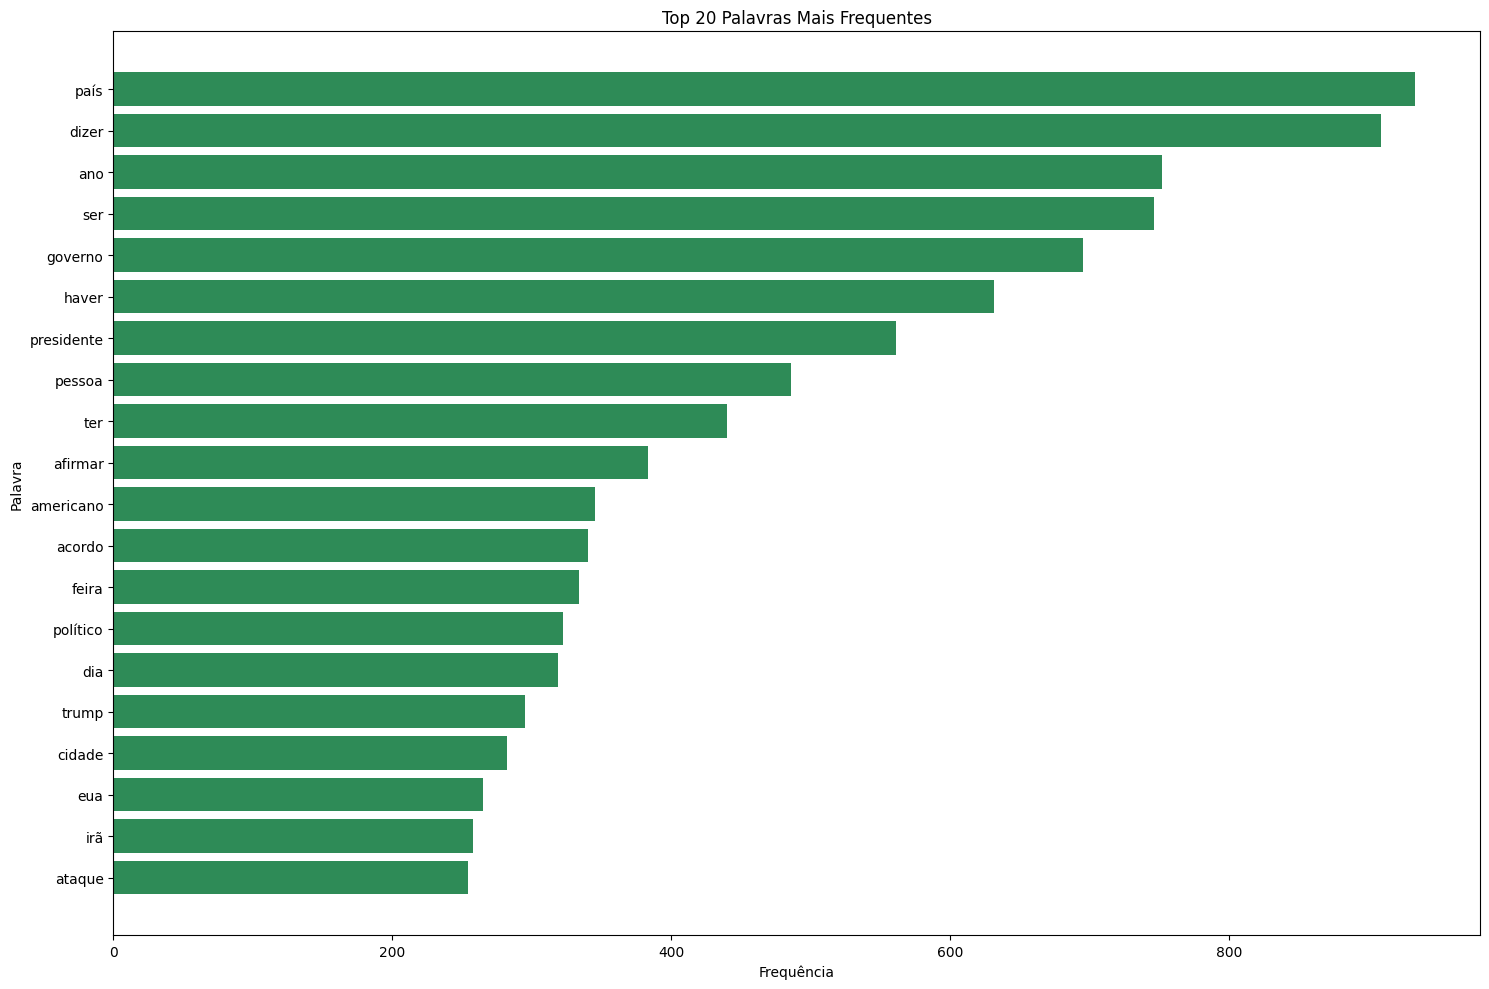

In [17]:
#Somando a contagem de cada palavra no corpus de documentos
word_counts = X_train_vectorized.sum(axis=0).A1

#criando um dicionário de frequências
freq_dict = dict(zip(feature_names, word_counts))

#Dataframe com as frequências
word_freq = pd.DataFrame({
    'palavra': feature_names,
    'frequencia': word_counts
}).sort_values('frequencia', ascending=False).head(20)

#plotando o gráfico
plt.figure(figsize=(15, 10))
plt.barh(word_freq['palavra'], word_freq['frequencia'], color='seagreen')
plt.gca().invert_yaxis()
plt.title('Top 20 Palavras Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.tight_layout()
plt.show()

# LDA

### Busca do melhor número de tópicos usando distância euclidiana e a coerência dos tópicos

In [18]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

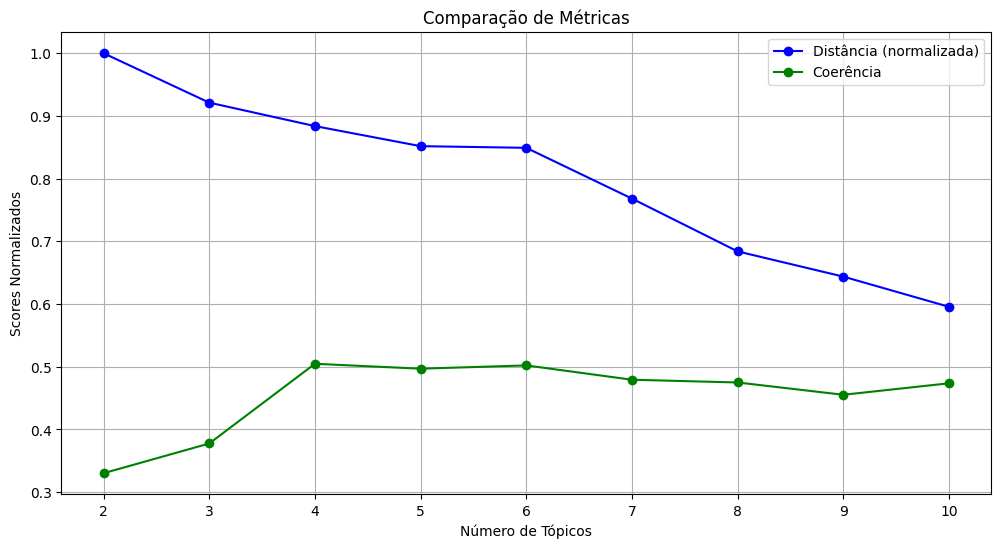

<Figure size 640x480 with 0 Axes>

In [19]:
#analisando coerência e dispersão para decidirmos o número de tópicos
def analyze_topics(X, texts, feature_names, max_topics=10):
    """Analisa tópicos com métricas de dispersão e coerência
    Recebe:
        X: dataset vetorizado
        texts: texto após pré-processamento
        feature_names: nomes das features
        max_topics: número máximo de tópicos a serem analisados

    Retorna:
        topic_nums: lista de números de tópicos
        mean_distances: lista de distâncias médias
        coherence_scores: lista de scores de coerência

    """
    #Pré-processamento necessário para cálculo de coerência
    tokenized_texts = [word_tokenize(text.lower()) for text in texts]
    dictionary = Dictionary(tokenized_texts)

    topic_nums = range(2, max_topics+1)
    mean_distances = []
    coherence_scores = []

    for n_topics in topic_nums:
        #Treinar LDA
        lda = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42)
        lda.fit(X_train_vectorized)

        #Métrica de dispersão
        topics = lda.components_
        centroid = np.mean(topics, axis=0)
        distances = [np.linalg.norm(topic - centroid) for topic in topics]
        mean_distances.append(np.mean(distances))

        #Métrica de coerência
        topics_words = []
        for topic in lda.components_:
            top_words_idx = topic.argsort()[-10:][::-1]
            topics_words.append([feature_names[idx] for idx in top_words_idx])

        coherence_model = CoherenceModel(
            topics=topics_words,
            texts=tokenized_texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_scores.append(coherence_model.get_coherence())

    return topic_nums, mean_distances, coherence_scores

topic_nums, distances, coherences = analyze_topics(X_train_vectorized, documents, feature_names=feature_names)

#plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(topic_nums, distances/np.max(distances), 'bo-', label='Distância (normalizada)')
plt.plot(topic_nums, coherences, 'go-', label='Coerência')
plt.xlabel('Número de Tópicos')
plt.ylabel('Scores Normalizados')
plt.title('Comparação de Métricas')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

### Decidindo o número de tópicos, treinando o LDA otimizado e mostrando algumas palavras por tópico

In [20]:
optimal_topics = 10

#Treinando um modelo otimizado de LDA com base no número de tópicos escolhido anteriormente
optimal_lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)

X_train_lda = optimal_lda.fit_transform(X_train_vectorized)
X_test_lda = optimal_lda.transform(X_test_vectorized)

labels_train = np.argmax(X_train_lda, axis=1)
labels_test = np.argmax(X_test_lda, axis=1)

y_train = labels_train
y_test = labels_test

#Mostrando as palavras mais relevantes em cada tópico
def print_top_words(model, feature_names, n_top_words=20):
    '''
    Recebe:
    model: o modelo de lda treinado
    feature_names: os nomes das features
    n_top_words: o número de palavras mais relevantes a serem mostradas por tópico
    '''
    for topic_idx, topic in enumerate(model.components_):
        message = f"Tópico #{topic_idx}: "
        message += " ".join([feature_names[i]
                           for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("\nPalavras mais relevantes por tópico:")
print_top_words(optimal_lda, feature_names)


Palavras mais relevantes por tópico:
Tópico #0: ano ser ter haver dizer pessoa mulher homem islâmico criança família de dia ei país guerra falar cidade pai dar
Tópico #1: governo país presidente oposição venezuela maduro eleição ser haver político econômico venezuelano crise dizer feira nacional parlamento assembleia opositor dia
Tópico #2: macri governo presidente ano cristina argentino haver dizer ex ser país argentina afirmar kirchner prisão irã caso direito mauricio macri mauricio
Tópico #3: país dizer refugiado ano pessoa ser governo haver ter afirmar chegar europa passado feira asilo crime de fronteira alemanha polícia
Tópico #4: ataque cidade pessoa polícia dizer feira terrorista capital islâmico ei região ficar morto autoridade atentado morrer never deixar tempestade segurança
Tópico #5: turco país haver acordo venezuela bloco post governo mercosul negociação publicar caracas erdogan adotar escola reportagem direito dizer ser assinar
Tópico #6: país governo dizer síria sírio h

# Visualização com t-SNE

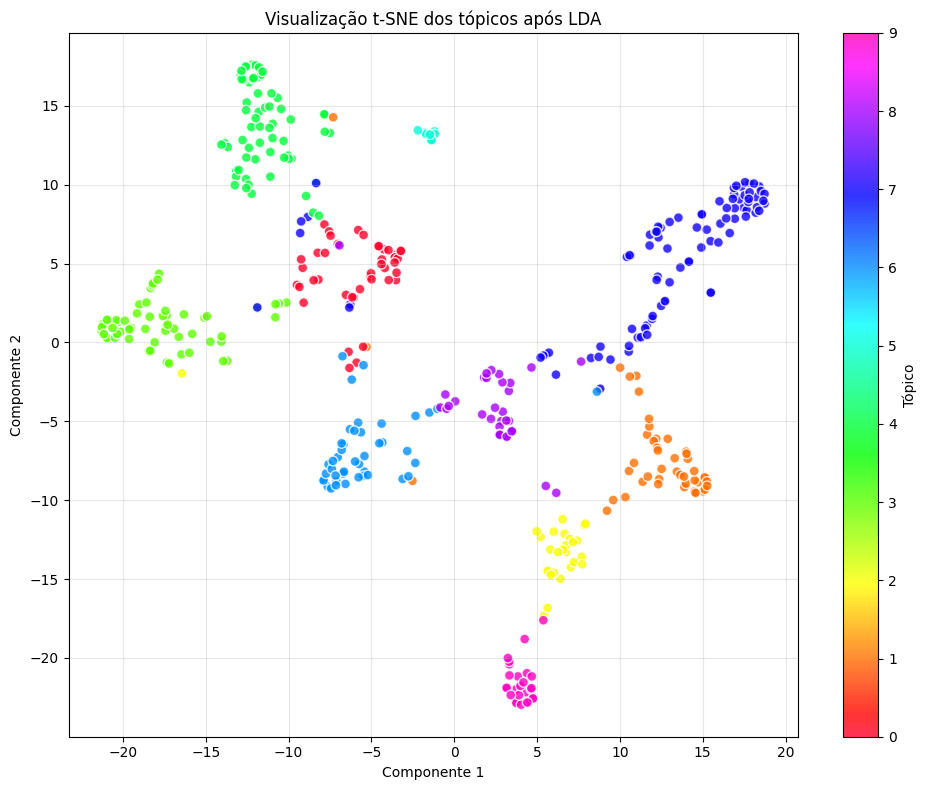

In [21]:
plt.figure(figsize=(10, 8))

#instanciando o t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=10000)
X_tsne = tsne.fit_transform(X_train_lda)

#plotando o gráfico
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='gist_rainbow', alpha=0.8, edgecolors='w', s=50)

#Título e nome dos eixos
plt.title('Visualização t-SNE dos tópicos após LDA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

#setando a legenda
cbar = plt.colorbar(scatter)
cbar.set_label('Tópico')

#adicionando um grid para melhor visualização
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Modelos de Classificação - Random Forest, CatBoost, Regressão Logística e SVM kernel RBF

In [22]:
#checando formato de X_train, X_test, y_train, y_test
display(X_train_lda.shape)
display(X_test_lda.shape)
display(y_train.shape)
display(y_test.shape)

(439, 10)

(110, 10)

(439,)

(110,)

In [23]:
%%capture
!pip install catboost

In [24]:
#NÃO RECOMENDO EXECUTAR; DEMOROU QUASE 2 HORAS PARA EU CONSEGUIR OS MELHORES HIPERPARÂMETROS. RODEI UMA VEZ E NUNCA MAIS

# from catboost import CatBoostClassifier

# results = []

# models = {
#     "SVM RBF": (SVC(probability=True, kernel='rbf', random_state=42), {"C": [0.01, 0.1, 1, 10], "gamma": ["scale", 0.01, 0.1, 1, 10]}),
#     "Regressão Logística": (LogisticRegression(random_state=42, verbose=0), {"solver": ["lbfgs", "sag"], "C": [0.01, 0.1, 1, 10], "penalty": ["l2", None]}),
#     "Random Forest": (RandomForestClassifier(random_state=42), {"n_estimators": [10, 50, 100], "max_depth": [None, 5, 10, 20]}),
#     "CatBoost": (CatBoostClassifier(verbose=0, random_state=42), {"iterations": [10, 50, 100], "depth": [4, 6, 8], "learning_rate": [0.01, 0.1, 0.2], "l2_leaf_reg": [1, 3, 5]})
# }

# for name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
#     grid_search.fit(X_train, y_train)

#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_

#     y_pred = best_model.predict(X_test)
#     y_pred_proba = best_model.predict_proba(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

#     results.append([name, best_params, accuracy, precision, recall, f1, roc_auc])

# results_df = pd.DataFrame(results, columns=["Modelo", "Parâmetros", "Acurácia", "Precisão", "Recall", "F1 Score", "AUC"])
# display(results_df)

In [25]:
results = []

#Treinando modelo de SVM RBF
rbf = SVC(probability=True, kernel='rbf', random_state=42, C=10, gamma='scale')
rbf.fit(X_train_lda, y_train)

cv = cross_validate(rbf, X_train_lda, y_train, cv=5, scoring={
        'accuracy': 'accuracy',
        'recall': 'recall_weighted',
        'precision': 'precision_weighted',
        'f1': 'f1_weighted',
        'roc_auc': 'roc_auc_ovr'
    }, return_train_score=True
)

y_proba = rbf.predict_proba(X_test_lda)
# roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

results.append({
    'model': 'Kernel RBF',
    #Test
    'test_accuracy': f"{cv['test_accuracy'].mean() * 100:.3f}%",
    'test_recall': f"{cv['test_recall'].mean() * 100:.3f}%",
    'test_precision': f"{cv['test_precision'].mean() * 100:.3f}%",
    'test_f1': f"{cv['test_f1'].mean() * 100:.3f}%",
    # 'test_roc_auc': f"{roc_auc * 100:.3f}%",

    #Train
    'train_accuracy': f"{cv['train_accuracy'].mean() * 100:.3f}%",
    'train_recall': f"{cv['train_recall'].mean() * 100:.3f}%",
    'train_precision': f"{cv['train_precision'].mean() * 100:.3f}%",
    'train_f1': f"{cv['train_f1'].mean() * 100:.3f}%",
    # 'train_roc_auc': f"{cv['train_roc_auc'].mean() * 100:.3f}%",
    'y_pred': rbf.predict(X_test_lda),
    'y_proba': y_proba
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1
0,Kernel RBF,92.247%,92.247%,92.842%,92.154%,99.373%,99.373%,99.385%,99.372%


In [26]:
#Treinando modelo de Regressão Logística
lr = LogisticRegression(random_state=42, solver="lbfgs", verbose=0, penalty=None)
lr.fit(X_train_lda, y_train)

cv = cross_validate(lr, X_train_lda, y_train, cv=5, scoring={
        'accuracy': 'accuracy',
        'recall': 'recall_weighted',
        'precision': 'precision_weighted',
        'f1': 'f1_weighted',
        'roc_auc': 'roc_auc_ovr'
    }, return_train_score=True
)


y_proba = lr.predict_proba(X_test_lda)
# roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

results.append({
    'model': 'Regressão Logística',
    #Test
    'test_accuracy': f"{cv['test_accuracy'].mean() * 100:.3f}%",
    'test_recall': f"{cv['test_recall'].mean() * 100:.3f}%",
    'test_precision': f"{cv['test_precision'].mean() * 100:.3f}%",
    'test_f1': f"{cv['test_f1'].mean() * 100:.3f}%",
    # 'test_roc_auc': f"{roc_auc * 100:.3f}%",

    #Train
    'train_accuracy': f"{cv['train_accuracy'].mean() * 100:.3f}%",
    'train_recall': f"{cv['train_recall'].mean() * 100:.3f}%",
    'train_precision': f"{cv['train_precision'].mean() * 100:.3f}%",
    'train_f1': f"{cv['train_f1'].mean() * 100:.3f}%",
    # 'train_roc_auc': f"{cv['train_roc_auc'].mean() * 100:.3f}%",
    'y_pred': lr.predict(X_test_lda),
    'y_proba': y_proba
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1
0,Kernel RBF,92.247%,92.247%,92.842%,92.154%,99.373%,99.373%,99.385%,99.372%
1,Regressão Logística,96.808%,96.808%,97.324%,96.821%,100.000%,100.000%,100.000%,100.000%


In [27]:
#Treinando modelo Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=None)

rf.fit(X_train_lda, y_train)

cv = cross_validate(rf, X_train_lda, y_train, cv=5, scoring={
        'accuracy': 'accuracy',
        'recall': 'recall_weighted',
        'precision': 'precision_weighted',
        'f1': 'f1_weighted',
        'roc_auc': 'roc_auc_ovr'
    }, return_train_score=True
)


y_proba = rf.predict_proba(X_test_lda)
# roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

results.append({
    'model': 'Random Forest',
    #Test
    'test_accuracy': f"{cv['test_accuracy'].mean() * 100:.3f}%",
    'test_recall': f"{cv['test_recall'].mean() * 100:.3f}%",
    'test_precision': f"{cv['test_precision'].mean() * 100:.3f}%",
    'test_f1': f"{cv['test_f1'].mean() * 100:.3f}%",
    # 'test_roc_auc': f"{roc_auc * 100:.3f}%",

    #Train
    'train_accuracy': f"{cv['train_accuracy'].mean() * 100:.3f}%",
    'train_recall': f"{cv['train_recall'].mean() * 100:.3f}%",
    'train_precision': f"{cv['train_precision'].mean() * 100:.3f}%",
    'train_f1': f"{cv['train_f1'].mean() * 100:.3f}%",
    # 'train_roc_auc': f"{cv['train_roc_auc'].mean() * 100:.3f}%",
    'y_pred': rf.predict(X_test_lda),
    'y_proba': y_proba
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1
0,Kernel RBF,92.247%,92.247%,92.842%,92.154%,99.373%,99.373%,99.385%,99.372%
1,Regressão Logística,96.808%,96.808%,97.324%,96.821%,100.000%,100.000%,100.000%,100.000%
2,Random Forest,95.209%,95.209%,95.374%,94.995%,100.000%,100.000%,100.000%,100.000%


In [28]:
from catboost import CatBoostClassifier

#treinando modelo CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42, iterations=100, depth=8, learning_rate=0.2, l2_leaf_reg=5)
cat.fit(X_train_lda, y_train)

cv = cross_validate(cat, X_train_lda, y_train, cv=5, scoring={
        'accuracy': 'accuracy',
        'recall': 'recall_weighted',
        'precision': 'precision_weighted',
        'f1': 'f1_weighted',
        'roc_auc': 'roc_auc_ovr'
    }, return_train_score=True
)

y_proba = cat.predict_proba(X_test_lda)
# roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

results.append({
    'model': 'CatBoost',
    #Test
    'test_accuracy': f"{cv['test_accuracy'].mean() * 100:.3f}%",
    'test_recall': f"{cv['test_recall'].mean() * 100:.3f}%",
    'test_precision': f"{cv['test_precision'].mean() * 100:.3f}%",
    'test_f1': f"{cv['test_f1'].mean() * 100:.3f}%",
    # 'test_roc_auc': f"{roc_auc * 100:.3f}%",

    #Train
    'train_accuracy': f"{cv['train_accuracy'].mean() * 100:.3f}%",
    'train_recall': f"{cv['train_recall'].mean() * 100:.3f}%",
    'train_precision': f"{cv['train_precision'].mean() * 100:.3f}%",
    'train_f1': f"{cv['train_f1'].mean() * 100:.3f}%",
    # 'train_roc_auc': f"{cv['train_roc_auc'].mean() * 100:.3f}%",
    'y_pred': cat.predict(X_test_lda),
    'y_proba': y_proba
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,test_accuracy,test_recall,test_precision,test_f1,train_accuracy,train_recall,train_precision,train_f1
0,Kernel RBF,92.247%,92.247%,92.842%,92.154%,99.373%,99.373%,99.385%,99.372%
1,Regressão Logística,96.808%,96.808%,97.324%,96.821%,100.000%,100.000%,100.000%,100.000%
2,Random Forest,95.209%,95.209%,95.374%,94.995%,100.000%,100.000%,100.000%,100.000%
3,CatBoost,94.073%,94.073%,94.308%,93.918%,100.000%,100.000%,100.000%,100.000%


# Análises SHAP - Escolhi o modelo Random Forest treinado anteriormente

 95%|=================== | 4172/4390 [00:20<00:01]       

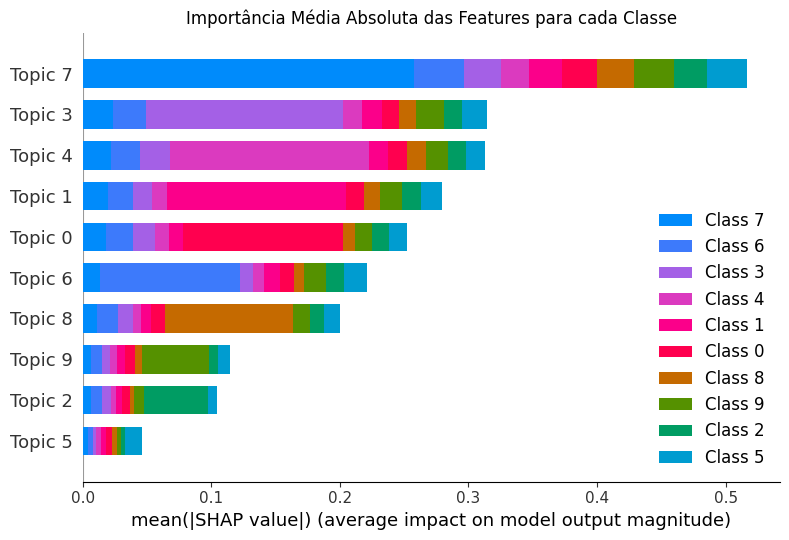

In [29]:
#criando um shap explainer
explainer = shap.TreeExplainer(rf, data=X_train_lda[:100], feature_perturbation="interventional", model_output="probability")

#pegando os shap values
general_shap_values = explainer.shap_values(X_train_lda)

#Gráfico de importância global
plt.figure(figsize=(12, 6))

if isinstance(general_shap_values, list):
    #combinando os valores de shap para todas as classes (caso multiclasse)
    combined_shap = np.abs(np.array(general_shap_values)).mean(0)

    shap.summary_plot(
        combined_shap,
        X_test_lda,
        feature_names=[f"Topic {i}" for i in range(10)],
        plot_type="bar",
        show=False
    )
else:
    #casos binários
    shap.summary_plot(
        general_shap_values,
        X_test_lda,
        feature_names=[f"Topic {i}" for i in range(10)],
        plot_type="bar",
        show=False
    )

plt.title("Importância Média Absoluta das Features para cada Classe")
plt.tight_layout()
plt.show()

In [35]:
general_shap_values.shape

(439, 10, 10)

## Analisando Classe 7

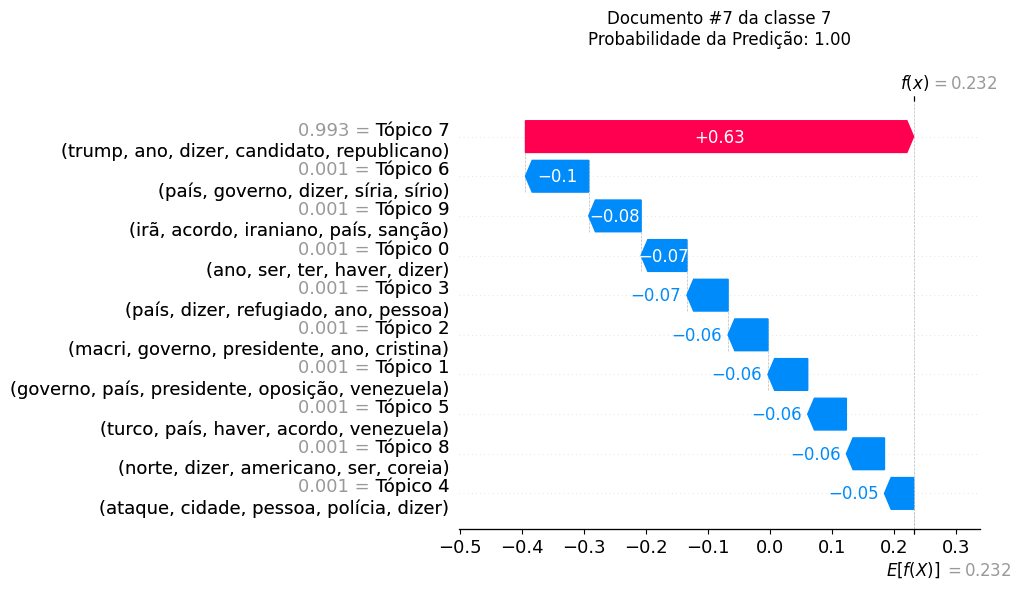

In [30]:
#analisando uma classe individualmente
target_class = 7
doc_idx = 7

#pegando os índices dos documentos onde o tópico escolhido é o dominante
topic_probs = optimal_lda.transform(vectorizer.transform(X_train))
target_idx = np.where(topic_probs.argmax(axis=1) == target_class)[0]

#pegando as palavras principais dos tópicos
topic_keywords = {
    i: ', '.join([feature_names[j]
                 for j in optimal_lda.components_[i].argsort()[-5:][::-1]])
    for i in range(10)
}

topic_shap_values = explainer.shap_values(X_train_lda[target_idx])

#plotando gráfico waterfall com as palavras e os tópicos para a classe selecionada
shap.plots.waterfall(
    shap.Explanation(
        values=topic_shap_values[target_class][doc_idx],
        base_values=explainer.expected_value[target_class],
        data=X_train_lda[target_idx][doc_idx],
        feature_names=[f"Tópico {i}\n({topic_keywords[i]})" for i in range(10)]
    ),
    max_display=10,
    show=False
)

plt.title(f"Documento #{doc_idx} da classe {target_class}\nProbabilidade da Predição: {rf.predict_proba([X_train_lda[target_idx][doc_idx]])[0][target_class]:.2f}",
          fontsize=12, pad=20)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [32]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[target_class],
    topic_shap_values[target_class][doc_idx],
    X_train_lda[target_idx][doc_idx],
    feature_names=[f"Tópico {i}" for i in range(10)],
    text_rotation=15
)

## Analisando Classe 5

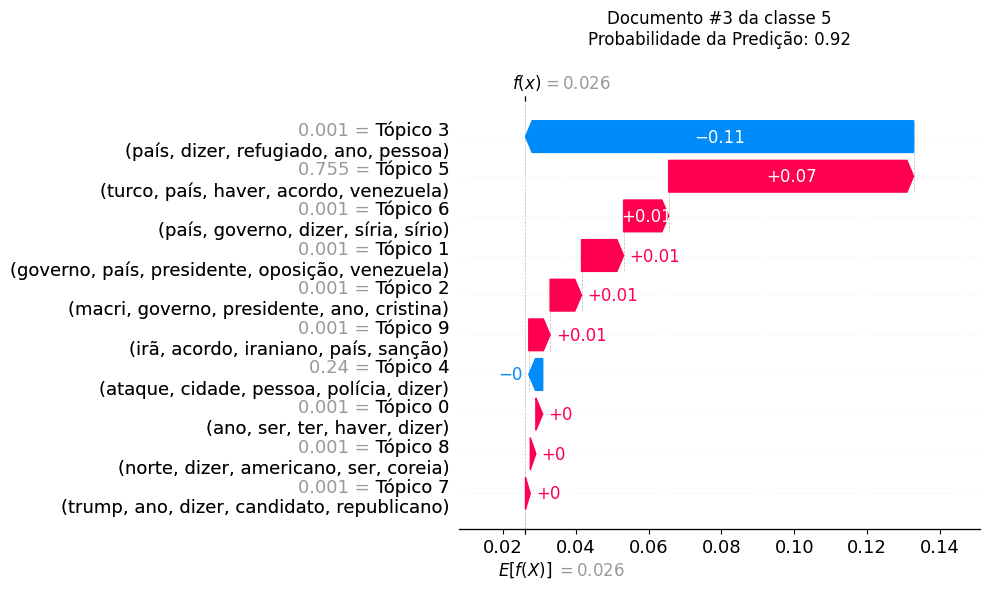

In [33]:
#analisando uma classe individualmente
target_class = 5
doc_idx = 3

#pegando os índices dos documentos onde o tópico escolhido é o dominante
topic_probs = optimal_lda.transform(vectorizer.transform(X_train))
target_idx = np.where(topic_probs.argmax(axis=1) == target_class)[0]

topic_shap_values = explainer.shap_values(X_train_lda[target_idx])

#plotando gráfico waterfall com as palavras e os tópicos para a classe selecionada
shap.plots.waterfall(
    shap.Explanation(
        values=topic_shap_values[target_class][doc_idx],
        base_values=explainer.expected_value[target_class],
        data=X_train_lda[target_idx][doc_idx],
        feature_names=[f"Tópico {i}\n({topic_keywords[i]})" for i in range(10)]
    ),
    max_display=10,
    show=False
)

plt.title(f"Documento #{doc_idx} da classe {target_class}\nProbabilidade da Predição: {rf.predict_proba([X_train_lda[target_idx][doc_idx]])[0][target_class]:.2f}",
          fontsize=12, pad=20)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [34]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[target_class],
    topic_shap_values[target_class][doc_idx],
    X_train_lda[target_idx][doc_idx],
    feature_names=[f"Tópico {i}" for i in range(10)],
    text_rotation=15
)

# Conclusões

Assim como foi verificado na plotagem com t-SNE, os dados foram agrupados de forma bem delimitada e bem coesa pelo LDA, graças ao estudo de coerência e dispersão realizado antes desse passo e à limpeza e pré-processamento realizados nos dados. Dessa forma, todos os modelos treinados foram capazes de prever, de forma consistente, as classes de forma correta e com uma margem de erro bem pequena. Então não foi surpresa alguma verificarmos as altas métricas resultantes de seus respectivos treinamentos. Também pudemos evidenciar que não houve indícios de overfitting em nenhum deles. Na análise do SHAP, optei pelo Random Forest por considerar um modelo mais robusto que o de regressão linear (o qual obteve o melhor desempenho). Como esperado, visto que extraímos os rótulos do próprio processo de LDA, o tópico examinado teve o maior impacto na sua classe correspondente. Por exemplo, a feature 7 teve o maior impacto na hora do modelo prever qual a probabilidade de um documento pertencer à classe 7, e inclusive é a feature com maior peso no desempenho geral do modelo. Já a feature 5, em contrapartida, influencia muito pouco o modelo em geral e também tem um peso bem pequeno na hora de impactar a probabilidade das classes. Acredito que isso aconteça pelo fato de se tratar de um aglomerado bem isolado e pequeno no espaço das features.